<a href="https://colab.research.google.com/github/NishaimLimbu/classes/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [26]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
78,8610862,M,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.160400,...,23.37,31.72,170.30,1623.0,0.1639,0.61640,0.768100,0.250800,0.5440,0.09964
384,902727,B,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.028640,...,14.24,17.37,96.59,623.7,0.1166,0.26850,0.286600,0.091730,0.2736,0.07320
355,9010258,B,12.56,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.043910,...,13.37,22.43,89.02,547.4,0.1096,0.20020,0.238800,0.092650,0.2121,0.07188
108,86355,M,22.27,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,...,28.40,28.01,206.80,2360.0,0.1701,0.69970,0.960800,0.291000,0.4055,0.09789
285,8912521,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431


In [28]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [29]:
data1=data.drop(columns=['id', 'fractal_dimension_se','smoothness_se','symmetry_se','texture_se','fractal_dimension_se','radius_se','area_se'])

In [30]:
data1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [31]:
data1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  perimeter_se             569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  concave_points_se        5

In [33]:
data1['diagnosis']=data1['diagnosis'].map({'M':1,'B':0})
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
x=data1.drop('diagnosis',axis=1)
y=data1['diagnosis']

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled[:5]


array([[0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.3690336 , 0.35139844, 0.13568182, 0.30062512, 0.62077552,
        0.14152452, 0.66831017, 0.45069799, 0.60113584, 0.61929156,
        0.56861022, 0.91202749, 0.59846245, 0.41886396],
       [0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        0.18176799, 0.20360825, 0.34875746, 0.37979798, 0.14132266,
        0.12444047, 0.08132304, 0.0469697 , 0.25383595, 0.60690146,
        0.30357143, 0.53981772, 0.43521431, 0.34755332, 0.15456336,
        0.19297125, 0.63917526, 0.23358959, 0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.51430893,
        0.4310165 , 0.46251172, 0.63568588, 0.50959596, 0.21124684,
        0.18037035, 0.2839547 , 0.09676768, 0.38984656, 0.55638563,
        0.36007463, 0.50844166, 0.37450845, 0.48358978, 0.38537513,
        0.35974441, 0.83505155, 0.40370589, 0.21343303],
       [0.210

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [38]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print (accuracy)
cr=classification_report(y_test,y_pred)
print (cr)

0.9473684210526315
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [39]:
data1.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'perimeter_se', 'compactness_se', 'concavity_se', 'concave_points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [41]:
import pandas as pd

features = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'perimeter_se', 'compactness_se', 'concavity_se', 'concave_points_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst',
    'symmetry_worst', 'fractal_dimension_worst'
]

input_values = []

for feature in features:
    value = float(input(f"Enter value for {feature}: "))
    input_values.append(value)

user_data = pd.DataFrame([input_values], columns=features)

predict = model.predict(user_data)

print("Diagnosis is:", "M" if predict[0] == 1 else "B")


Enter value for radius_mean: 12
Enter value for texture_mean: 15
Enter value for perimeter_mean: 1241
Enter value for area_mean: 1215
Enter value for smoothness_mean: 12
Enter value for compactness_mean: 1
Enter value for concavity_mean: 1
Enter value for concave_points_mean: 1
Enter value for symmetry_mean: 1
Enter value for fractal_dimension_mean: 1
Enter value for perimeter_se: 1
Enter value for compactness_se: 1
Enter value for concavity_se: 1
Enter value for concave_points_se: 1
Enter value for radius_worst: 1
Enter value for texture_worst: 1
Enter value for perimeter_worst: 1
Enter value for area_worst: 1
Enter value for smoothness_worst: 1
Enter value for compactness_worst: 1
Enter value for concavity_worst: 1
Enter value for concave_points_worst: 1
Enter value for symmetry_worst: 1
Enter value for fractal_dimension_worst: 1
Diagnosis is: B


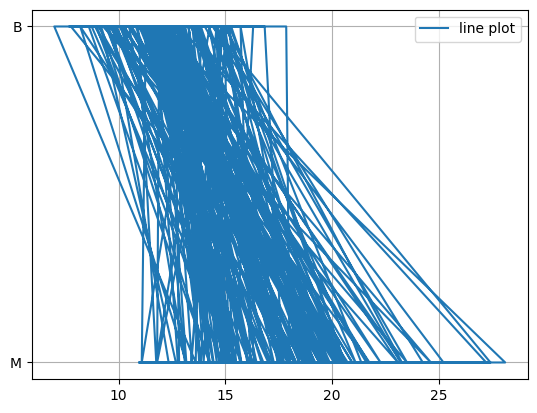

In [51]:
import matplotlib.pyplot as plt
plt.plot(data['radius_mean'],data['diagnosis'], label='line plot')
plt.xlabel=('X')
plt.ylabel=('Y')
plt.title=('Breast Cancer')
plt.legend()
plt.grid('True')
plt.show()

In [54]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print (cm)

[[71  0]
 [ 6 37]]


TypeError: 'str' object is not callable

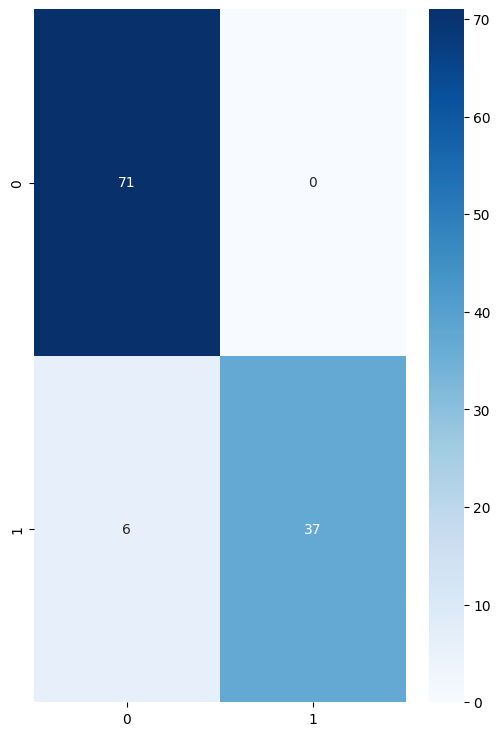

In [60]:
plt.figure(figsize=(6,9))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()